In [54]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
resp=requests.get( 'https://www.mohfw.gov.in/')
#print(resp.content)
#print(resp.text)

In [39]:
import bs4
soup=bs4.BeautifulSoup(resp.text,'html.parser')




In [50]:

all_rows=soup.find_all('tr')
def extract_content(row_td):
    tlist=[]
    for td in row_td:
        
        tlist.append(td.get_text().replace('\n',''))
    #print(tlist)
    return tlist

rows=[]
for row in all_rows:
    #print(row.get_text())
    
    row = extract_content(row.find_all('td'))
    rows.append(row)
#print(rows)

In [80]:

table_data=rows[1:-2]


cols = ['Serial No.','States','Confirmed','Recoverd','Death']
dataframe = pd.DataFrame(data =table_data ,columns=cols)

dataframe.Confirmed = dataframe.Confirmed.map(int)
dataframe.Recoverd = dataframe.Recoverd.map(int)
dataframe.Death = dataframe.Death.map(int)

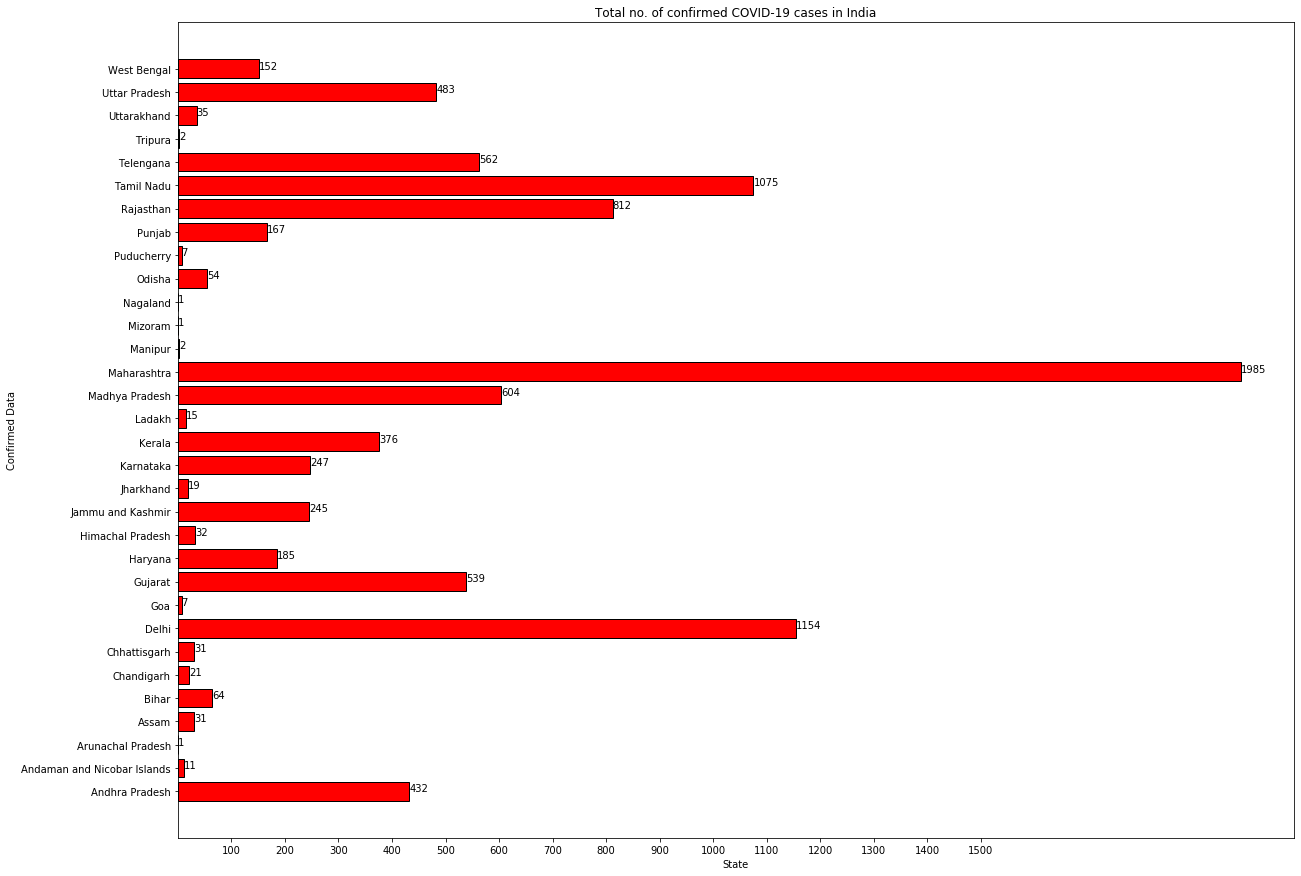

In [59]:
plt.figure(figsize=(20,15))
plt.barh(dataframe.States,dataframe.Confirmed,color='red',edgecolor='k')
plt.title("Total no. of confirmed COVID-19 cases in India")
plt.xticks([100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500])
plt.xlabel("State")
plt.ylabel("Confirmed Data")
for index,val in enumerate(dataframe.Confirmed):
    plt.text(val,index,str(val))
plt.show()


In [63]:
import seaborn as sbn

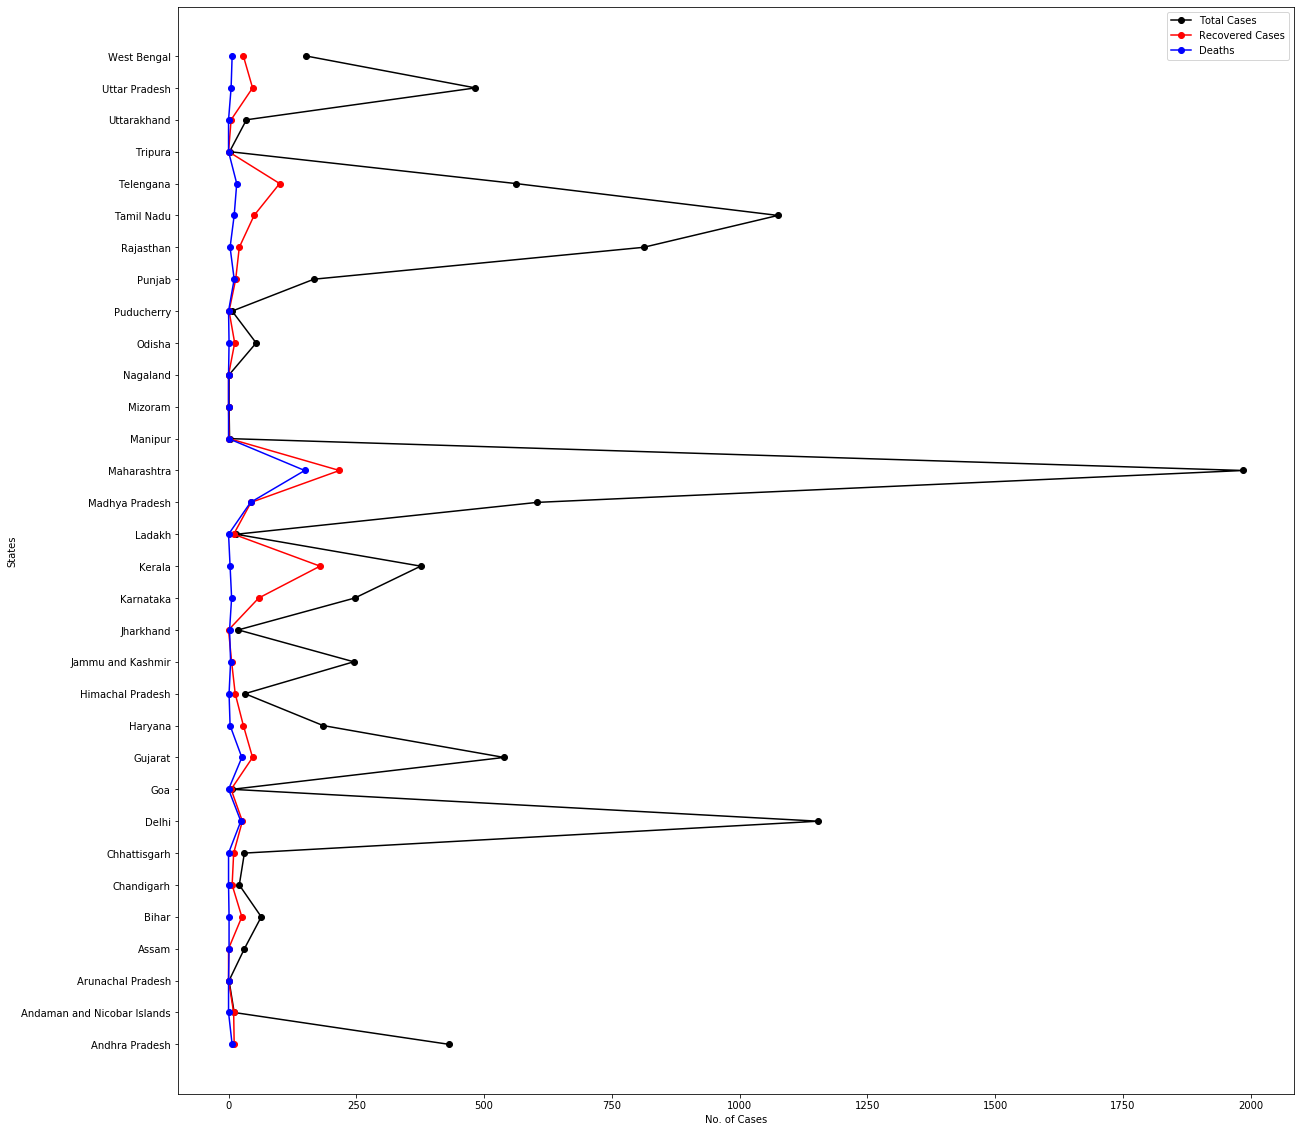

In [83]:

plt.figure(figsize=(20,20))
plt.plot(dataframe.Confirmed,dataframe.States,c='k',marker='o')
plt.plot(dataframe.Recoverd,dataframe.States,c='r',marker='o')
plt.plot(dataframe.Death,dataframe.States,c='b',marker='o')
plt.gca().legend(('Total Cases','Recovered Cases','Deaths'))
plt.xlabel('No. of Cases')
plt.ylabel('States')
plt.show()